In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.38 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
import pandas as pd

# Raw GitHub link for Titanic dataset
url = "https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv"

# Load CSV
df = pd.read_csv(url)

# Quick check
print(df.head())
print(df.info())
print(df.isnull().sum())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


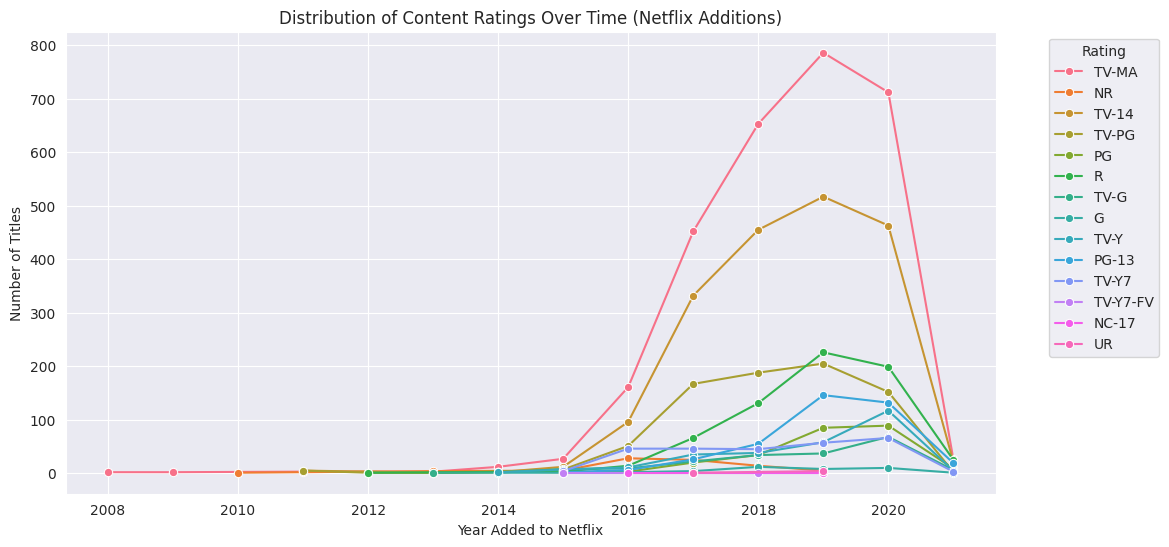

In [8]:
#How has the distribution of content ratings changed over time?
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the date_added column is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added (since it's when Netflix added the title)
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing years or ratings
rating_trend = df.dropna(subset=['year_added', 'rating'])

# Group by year and rating to count how many titles of each rating were added
rating_year = rating_trend.groupby(['year_added', 'rating']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_year, x='year_added', y='count', hue='rating', marker='o')
plt.title('Distribution of Content Ratings Over Time (Netflix Additions)')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

          count       mean       std  min  25%  50%   75%    max
type                                                            
Movie    5377.0  12.079970  9.663282  4.0  7.0  9.0  13.0   83.0
TV Show  2410.0   8.808299  5.664826  4.0  6.0  7.0  10.0  100.0


/tmp/ipython-input-2051082993.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_age, x='type', y='content_age', palette='Set2')


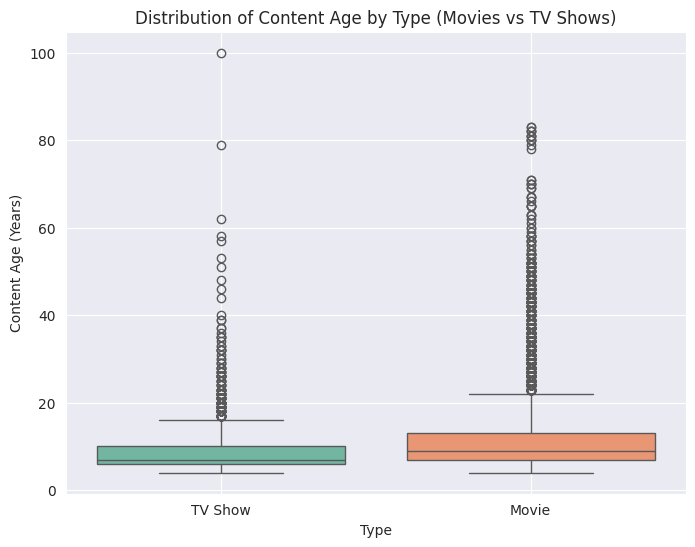


Average Content Age by Type:
 type
Movie      12.079970
TV Show     8.808299
Name: content_age, dtype: float64


In [9]:
#Is there a relationship between content age and its type (Movie vs. TV Show)?
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Drop missing release years or type
df_age = df.dropna(subset=['release_year', 'type']).copy()

# Calculate content age
current_year = datetime.now().year
df_age['content_age'] = current_year - df_age['release_year']

# Basic descriptive stats
print(df_age.groupby('type')['content_age'].describe())

# Boxplot to visualize distribution
plt.figure(figsize=(8,6))
sns.boxplot(data=df_age, x='type', y='content_age', palette='Set2')
plt.title('Distribution of Content Age by Type (Movies vs TV Shows)')
plt.xlabel('Type')
plt.ylabel('Content Age (Years)')
plt.grid(True)
plt.show()

# Optional: mean content age comparison
mean_ages = df_age.groupby('type')['content_age'].mean()
print("\nAverage Content Age by Type:\n", mean_ages)

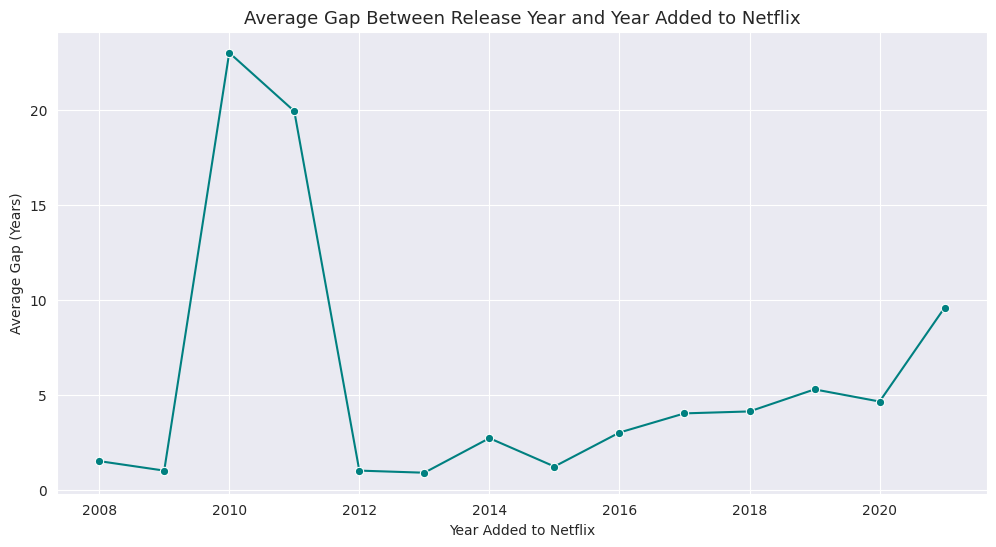

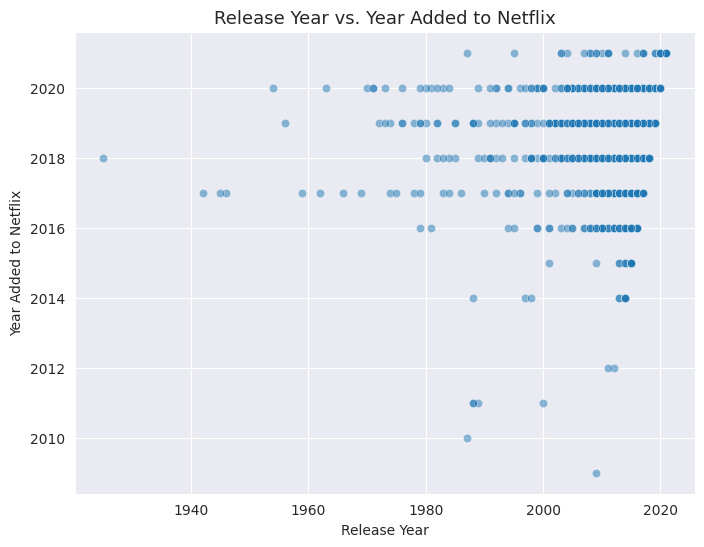

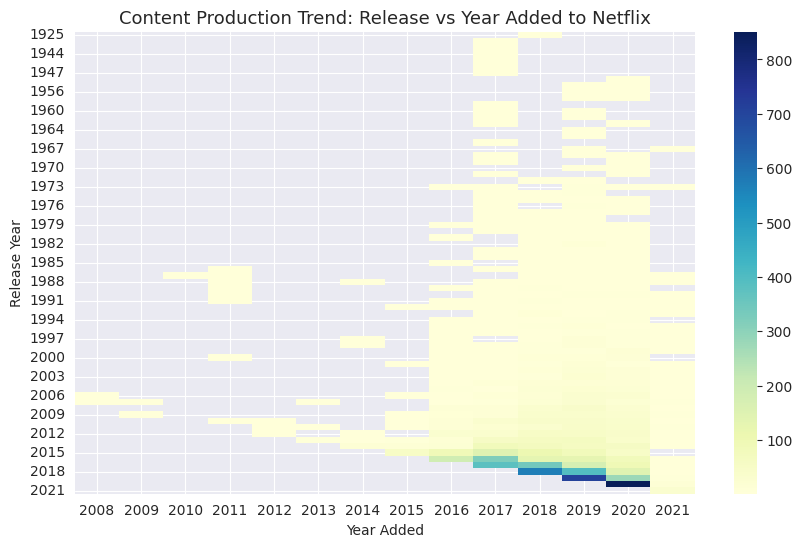

/tmp/ipython-input-4252916916.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='gap_years', palette='Set2')


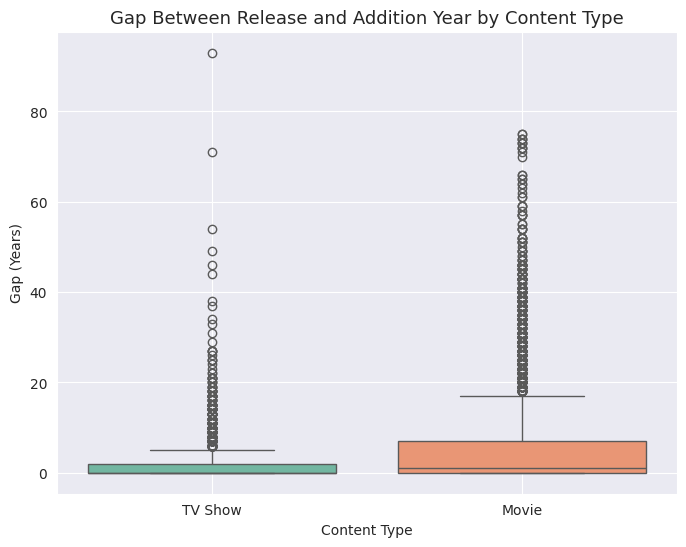

Average Gap (Years) by Type:
 type
Movie      5.56
TV Show    2.25
Name: gap_years, dtype: float64

Overall Average Gap: 4.57 years

💡 Insights to look for:
- If the average gap decreases → Netflix is adding newer content faster.
- If Movies have a higher gap → Netflix often adds older films.
- If TV Shows have a smaller gap → Most are new releases or Netflix Originals.
- In the heatmap, dark cells near the diagonal = newly released content added quickly.



In [10]:
#Can we identify any trends in content production based on the release year vs. the year added to Netflix?
# 📊 Netflix Data: Trend Analysis - Release Year vs Year Added

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv')  # Change path if needed

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop missing years or date_added
df = df.dropna(subset=['release_year', 'date_added']).copy()

# Extract year added
df['year_added'] = df['date_added'].dt.year

# Calculate gap between release and addition year
df['gap_years'] = df['year_added'] - df['release_year']

# Remove negative gaps (invalid data)
df = df[df['gap_years'] >= 0]

# 📈 Plot 1: Average gap over time
plt.figure(figsize=(12,6))
avg_gap = df.groupby('year_added')['gap_years'].mean().reset_index()
sns.lineplot(data=avg_gap, x='year_added', y='gap_years', marker='o', color='teal')
plt.title('Average Gap Between Release Year and Year Added to Netflix', fontsize=13)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Gap (Years)')
plt.grid(True)
plt.show()

# 📉 Plot 2: Scatter plot - Release vs Added year
plt.figure(figsize=(8,6))
sample_df = df.sample(min(2000, len(df)), random_state=42)  # Sample for readability
sns.scatterplot(data=sample_df, x='release_year', y='year_added', alpha=0.5)
plt.title('Release Year vs. Year Added to Netflix', fontsize=13)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.grid(True)
plt.show()

# 🔥 Plot 3: Heatmap for density visualization
plt.figure(figsize=(10,6))
heat_df = df.pivot_table(index='release_year', columns='year_added', values='show_id', aggfunc='count')
sns.heatmap(heat_df, cmap='YlGnBu')
plt.title('Content Production Trend: Release vs Year Added to Netflix', fontsize=13)
plt.xlabel('Year Added')
plt.ylabel('Release Year')
plt.show()

# 📊 Plot 4: Boxplot for gap by type (Movies vs TV Shows)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='type', y='gap_years', palette='Set2')
plt.title('Gap Between Release and Addition Year by Content Type', fontsize=13)
plt.xlabel('Content Type')
plt.ylabel('Gap (Years)')
plt.grid(True)
plt.show()

# 🧠 Summary insights
print("Average Gap (Years) by Type:\n", df.groupby('type')['gap_years'].mean().round(2))
print("\nOverall Average Gap:", round(df['gap_years'].mean(), 2), "years")

print("""
💡 Insights to look for:
- If the average gap decreases → Netflix is adding newer content faster.
- If Movies have a higher gap → Netflix often adds older films.
- If TV Shows have a smaller gap → Most are new releases or Netflix Originals.
- In the heatmap, dark cells near the diagonal = newly released content added quickly.
""")


In [11]:
pip install scikit-learn

In [12]:
!pip install nltk

director
Unknown                   2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Lance Bangs                  8
Hakan Algül                  8
Ryan Polito                  8
Quentin Tarantino            8
Robert Rodriguez             8
Shannon Hartman              8
Kunle Afolayan               8
Johnnie To                   8
Fernando Ayllón              7
McG                          7
Name: count, dtype: int64


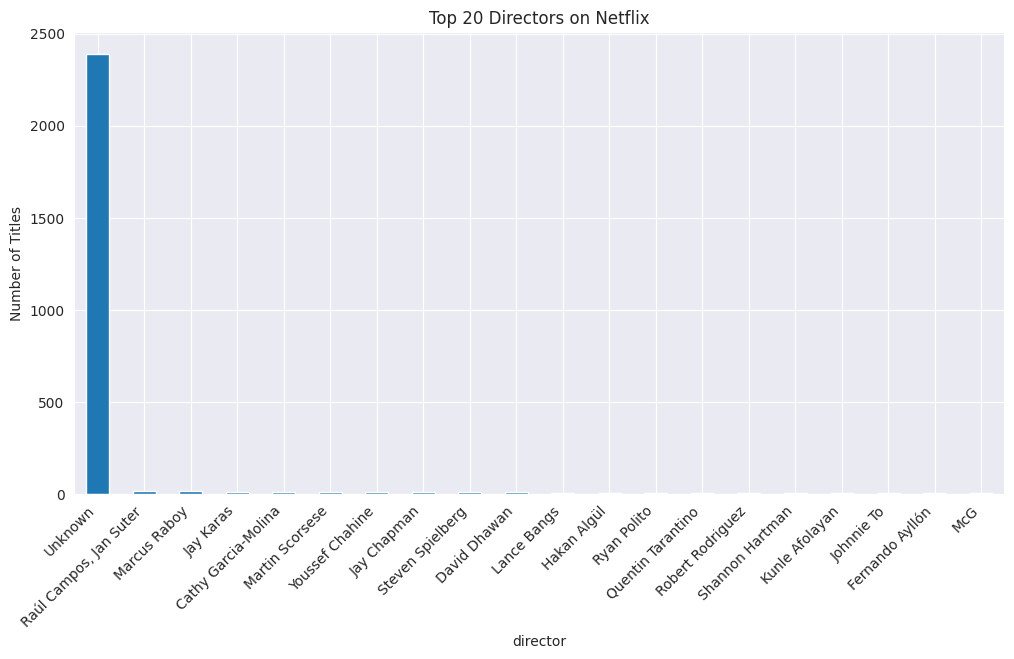

In [15]:
#Who are the top directors on Netflix?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset/main/Datasets/netflix_titles.csv')

# Fill missing directors with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Count titles per director
top_directors = df['director'].value_counts().head(20)  # top 20 directors

# Display
print(top_directors)

# Optional: Barplot
plt.figure(figsize=(12,6))
top_directors.plot(kind='bar')
plt.title('Top 20 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()
